# Evaluation and Analysis

- Apply 4 or more performance metrics to analyze the results
- Include 3 or more visualization techniques for presenting the results
- Compare and analyze all the ML models that you have built for the project and present the performance analysis

In [5]:
import pandas as pd
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Explore preprocessed data 

In [6]:
sheet = pd.read_csv('./preprocessed_data.csv')

In [7]:
sheet.head()

,0,1,2,3,4,5,6,7,8,9,...,5151,5152,5153,5154,5155,5156,5157,5158,5159,class
0,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,...,5.140539,3.180239,-1.843062,-14.799632,1.048248,2.937207,-60.876125,3.098228,4.940719,0
1,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,...,-60.718200,-60.718200,-60.718200,-2.394113,-60.718200,-4.563484,-60.718200,-60.718200,-3.347412,0
2,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,...,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,0
3,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,...,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,0
4,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,...,-5.162120,-18.417093,0.573289,2.564047,3.433276,-3.935794,-8.080255,-61.072853,-39.713818,0


In [8]:
X_full = sheet.iloc[:, :-1]
Y_full = sheet.iloc[:,-1:].values

In [9]:
X_full.shape

(6678, 5160)

In [10]:
Y_full.shape

(6678, 1)

Dimensionality Reduction

PCA

In [11]:
from sklearn.decomposition import PCA

Peform principal component analysis while retaining 95% variance over our data

In [12]:
pca = PCA(n_components=0.95)
X_full_pca = pca.fit_transform(X_full)

Random Forest as Feature Selection

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [14]:
rf_feature_select = SelectFromModel(RandomForestClassifier(n_estimators=100, max_leaf_nodes=9, n_jobs=-1))

#### Combining Both Techniques

In [15]:
from sklearn.pipeline import Pipeline

Train-test split the data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.15, random_state=42)

In [13]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (5676, 5160)
X_test:  (1002, 5160)
Y_train:  (5676, 1)
Y_test:  (1002, 1)


### K-Nearest Neighbor (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

#### Evaluate Accuracy with different K-Values

In [ ]:
accuracy_list = list()
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, Y_train)   
    accuracy_list.append((knn.score(X_test, Y_test)*100))

Text(0, 0.5, 'Accuracy Rate')

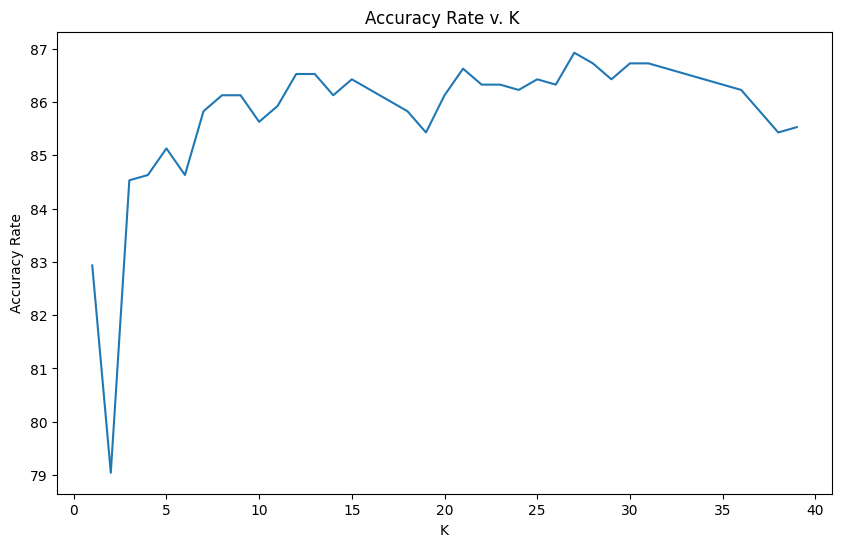

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_list)
plt.title('Accuracy Rate v. K ')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

##### The elbow plot seems to show that a k-value between 5-10 is acceptable

##### Classifcation report and confusion matrix for k = 7 

In [20]:
knn = Pipeline([
    ('pca', pca),
    ('rf', rf_feature_select),
    ('knn', KNeighborsClassifier(n_neighbors=7, metric='euclidean'))
    ])
# knn = KNeighborsClassifier(n_neighbors=7, metric="euclidean")
knn.fit(X_train, Y_train) 

/Users/nicholascaro/opt/anaconda3/envs/hello-tf/lib/python3.8/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/Users/nicholascaro/opt/anaconda3/envs/hello-tf/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('rf',
                 SelectFromModel(estimator=RandomForestClassifier(max_leaf_nodes=9,
                                                                  n_jobs=-1))),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=7))])

In [21]:
Y_predict = knn.predict(X_test)

In [22]:
target_names = ['indian', 'malayalam', 'australian', 'odiya', 'welsh', 'telugu', 'bangla', 'british', 'american']
print(classification_report(Y_test, Y_predict, target_names=target_names))
cm = confusion_matrix(Y_test, Y_predict, labels= knn.classes_)
print(cm)

              precision    recall  f1-score   support

      indian       0.96      1.00      0.98       122
   malayalam       0.98      0.97      0.97       100
  australian       0.92      0.91      0.91       106
       odiya       0.97      0.99      0.98       118
       welsh       0.99      0.99      0.99       115
      telugu       1.00      0.97      0.99       111
      bangla       1.00      1.00      1.00       123
     british       0.93      0.99      0.96       118
    american       0.97      0.88      0.92        89

    accuracy                           0.97      1002
   macro avg       0.97      0.97      0.97      1002
weighted avg       0.97      0.97      0.97      1002

[[122   0   0   0   0   0   0   0   0]
 [  0  97   0   3   0   0   0   0   0]
 [  4   0  96   0   1   0   0   4   1]
 [  0   1   0 117   0   0   0   0   0]
 [  0   0   1   0 114   0   0   0   0]
 [  1   1   0   0   0 108   0   0   1]
 [  0   0   0   0   0   0 123   0   0]
 [  0   0   1   0   0 

##### Confusion Matrix Display

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= knn.classes_)

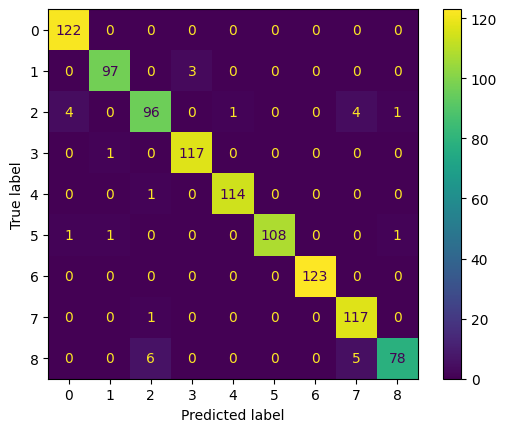

In [25]:
disp.plot()

### Decision Trees Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree = Pipeline([
    ('pca', pca),
    ('rf', rf_feature_select),
    ('algo', DecisionTreeClassifier(max_leaf_nodes=50))
])

In [46]:
tree.fit(X_train, Y_train)

/Users/nicholascaro/opt/anaconda3/envs/hello-tf/lib/python3.8/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('rf',
                 SelectFromModel(estimator=RandomForestClassifier(max_leaf_nodes=9,
                                                                  n_jobs=-1))),
                ('algo', DecisionTreeClassifier(max_leaf_nodes=50))])

In [39]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [47]:
export_graphviz(
        tree.named_steps['algo'],
        "tree.dot",
        rounded=True,
        filled=True
    )

In [49]:
import os

In [51]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [ ]:
Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))